#Data collection  and analysis with Spotify API
Using the Spotify API to collect real-time music data from Spotify and create a dataset of music with their features and popularity to apply some EDA.

## 1- Obtainining an access token
An access token is a credential that is used to access protected resources. In this case, it is used to access the Spotify API.

In [ ]:
# import libraries
import requests
import base64

In [ ]:
# save ID and secret
CLIENT_ID = "49a7bfa69cc343018f1c5362804f804c"
CLIENT_SECRET = "d881bac129b545a9b30bb4395b19c0c1"

In [ ]:
# encode credentials using base64
client_credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# request the access token
token_url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization': f'Basic {client_credentials_base64.decode()}'
}
data = {
    'grant_type': 'client_credentials'
}
response = requests.post(token_url, data=data, headers=headers)

if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained successfully.")
else:
    print("Error obtaining access token.")
    exit()

Access token obtained successfully.


##2-Extracting Detailed information
After obtaining the access token,  I’ll write a Python function to extract detailed information about each track in any Spotify playlist.

In [ ]:
# importing libraries
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [ ]:
# define the function
def get_trending_playlist_data(playlist_id, access_token):
    # set up spotipy with the access token
    sp = spotipy.Spotify(auth=access_token)
    # get the tracks from the playlist
    playlist_tracks = sp.playlist_tracks(playlist_id, fields='items(track(id, name, artists, album(id, name)))')

    # extract relevant information and store in a list of dictionaries
    music_data = []
    for track_info in playlist_tracks['items']:
        track = track_info['track']
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album_name = track['album']['name']
        album_id = track['album']['id']
        track_id = track['id']

        # get release date of the album
        try:
            album_info = sp.album(album_id) if album_id != 'Not available' else None
            release_date = album_info['release_date'] if album_info else None
        except:
            release_date = None

        # get popularity of the track
        try:
            track_info = sp.track(track_id) if track_id != 'Not available' else None
            popularity = track_info['popularity'] if track_info else None
        except:
            popularity = None

        # add additional track information to the track data
        track_data = {
            'Track Name': track_name,
            'Artists': artists,
            'Album Name': album_name,
            'Album ID': album_id,
            'Track ID': track_id,
            'Popularity': popularity,
            'Release Date': release_date,
            'Explicit': track_info.get('explicit', None),
            'External URLs': track_info.get('external_urls', {}).get('spotify', None),

        }

        music_data.append(track_data)

    # create a pandas dataframe from the list of dictionaries
    df = pd.DataFrame(music_data)

    return df

In [ ]:
# the id of "And, baby, that's show business for you" playlist
playlist_id = '65uAjFTt4N8sEJeonhNOBL'

# call the function to get the music data from the playlist and store it in a DataFrame
music_df = get_trending_playlist_data(playlist_id, access_token)


In [ ]:
music_df

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Explicit,External URLs
0,The Fate of Ophelia,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,53iuhJlwXhSER5J2IYYv1W,99,2025-10-03,False,https://open.spotify.com/track/53iuhJlwXhSER5J...
1,Elizabeth Taylor,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,1jgTiNob5cVyXeJ3WgX5bL,96,2025-10-03,False,https://open.spotify.com/track/1jgTiNob5cVyXeJ...
2,Opalite,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,3yWuTOYDztXjZxdE2cIRUa,97,2025-10-03,False,https://open.spotify.com/track/3yWuTOYDztXjZxd...
3,Father Figure,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,03bTIHJElXZ0O0jqOQvAbY,95,2025-10-03,True,https://open.spotify.com/track/03bTIHJElXZ0O0j...
4,Eldest Daughter,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,62HoDY1Km6lm47haFpUn9c,94,2025-10-03,True,https://open.spotify.com/track/62HoDY1Km6lm47h...
5,Ruin The Friendship,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,62V2ZHslgQV98gH4AuVXnr,94,2025-10-03,False,https://open.spotify.com/track/62V2ZHslgQV98gH...
6,Actually Romantic,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,2x3mwb96B6TquRqMtbxUE1,94,2025-10-03,True,https://open.spotify.com/track/2x3mwb96B6TquRq...
7,Wi$h Li$t,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,2TEQvxxQabwLQMqWMg1qGu,94,2025-10-03,True,https://open.spotify.com/track/2TEQvxxQabwLQMq...
8,Wood,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,5ylJtmaWPJ33cW3En7WOu0,94,2025-10-03,True,https://open.spotify.com/track/5ylJtmaWPJ33cW3...
9,CANCELLED!,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,1appZ3c336FkPvCuywfmrs,94,2025-10-03,True,https://open.spotify.com/track/1appZ3c336FkPvC...


##3- Applying some EDA
Understand our dataframe, extract insights and visualize.

In [ ]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Track Name     34 non-null     object
 1   Artists        34 non-null     object
 2   Album Name     34 non-null     object
 3   Album ID       34 non-null     object
 4   Track ID       34 non-null     object
 5   Popularity     34 non-null     int64 
 6   Release Date   34 non-null     object
 7   Explicit       34 non-null     bool  
 8   External URLs  34 non-null     object
dtypes: bool(1), int64(1), object(7)
memory usage: 2.3+ KB


In [ ]:
# highlight top 5 most popular tracks in the dataframe
def highlight_high_popularity(s):
    """
    Highlights high popularity 90 threshold across the row.
    """
    is_high = s['Popularity'] > 90
    return ['background-color: lightgreen' if is_high else '' for v in s]

music_df.style.apply(highlight_high_popularity, axis=1, subset=['Popularity'])


,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Explicit,External URLs
0,The Fate of Ophelia,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,53iuhJlwXhSER5J2IYYv1W,99,2025-10-03,False,https://open.spotify.com/track/53iuhJlwXhSER5J2IYYv1W
1,Elizabeth Taylor,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,1jgTiNob5cVyXeJ3WgX5bL,96,2025-10-03,False,https://open.spotify.com/track/1jgTiNob5cVyXeJ3WgX5bL
2,Opalite,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,3yWuTOYDztXjZxdE2cIRUa,97,2025-10-03,False,https://open.spotify.com/track/3yWuTOYDztXjZxdE2cIRUa
3,Father Figure,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,03bTIHJElXZ0O0jqOQvAbY,95,2025-10-03,True,https://open.spotify.com/track/03bTIHJElXZ0O0jqOQvAbY
4,Eldest Daughter,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,62HoDY1Km6lm47haFpUn9c,94,2025-10-03,True,https://open.spotify.com/track/62HoDY1Km6lm47haFpUn9c
5,Ruin The Friendship,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,62V2ZHslgQV98gH4AuVXnr,94,2025-10-03,False,https://open.spotify.com/track/62V2ZHslgQV98gH4AuVXnr
6,Actually Romantic,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,2x3mwb96B6TquRqMtbxUE1,94,2025-10-03,True,https://open.spotify.com/track/2x3mwb96B6TquRqMtbxUE1
7,Wi$h Li$t,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,2TEQvxxQabwLQMqWMg1qGu,94,2025-10-03,True,https://open.spotify.com/track/2TEQvxxQabwLQMqWMg1qGu
8,Wood,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,5ylJtmaWPJ33cW3En7WOu0,94,2025-10-03,True,https://open.spotify.com/track/5ylJtmaWPJ33cW3En7WOu0
9,CANCELLED!,Taylor Swift,The Life of a Showgirl,4a6NzYL1YHRUgx9e3YZI6I,1appZ3c336FkPvCuywfmrs,94,2025-10-03,True,https://open.spotify.com/track/1appZ3c336FkPvCuywfmrs


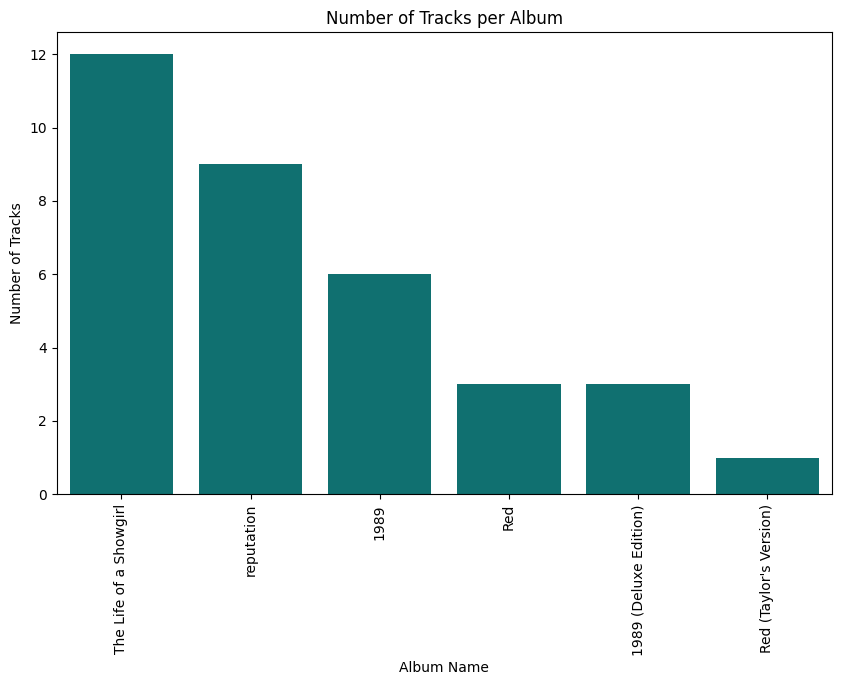

In [ ]:
# Create some visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# barplot highlighting the number of tracks in this playlist from each album
plt.figure(figsize=(10, 6))
sns.countplot(data=music_df, x='Album Name', order=music_df['Album Name'].value_counts().index, color='teal')
plt.xticks(rotation=90)
plt.xlabel('Album Name')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks per Album')
plt.show()

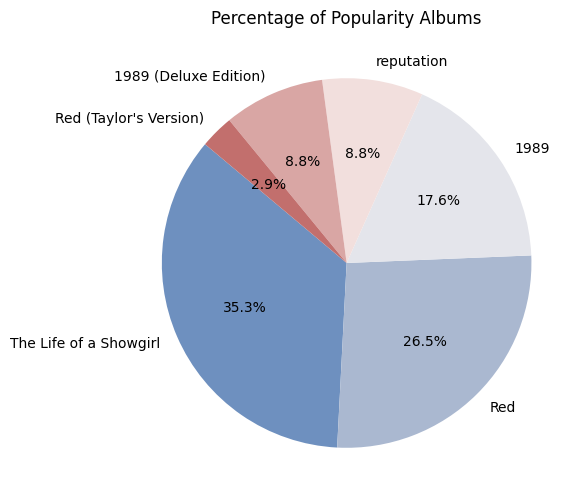

In [78]:
# Pie chart showcasing the percentage of popularity of albums
album_popularity_counts = music_df['Album Name'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(album_popularity_counts, labels= music_df['Album Name'].unique(), autopct='%1.1f%%',
        startangle=140,colors=sns.color_palette("vlag"))
plt.title('Percentage of Popularity Albums')
plt.show()


/tmp/ipython-input-352176342.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_popularity_by_artist.index, y=avg_popularity_by_artist.values, palette='viridis')


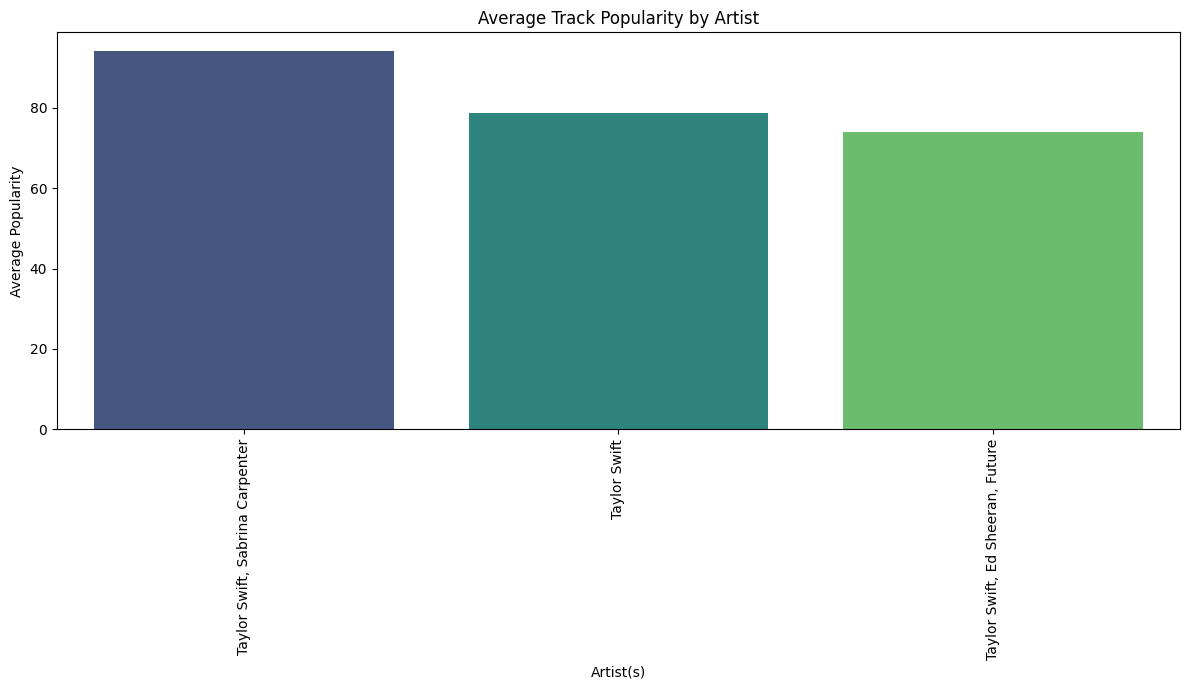

In [79]:
# Calculate the average popularity for each artist
avg_popularity_by_artist = music_df.groupby('Artists')['Popularity'].mean().sort_values(ascending=False)

# Create a bar plot of average popularity by artist
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_popularity_by_artist.index, y=avg_popularity_by_artist.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Artist(s)')
plt.ylabel('Average Popularity')
plt.title('Average Track Popularity by Artist')
plt.tight_layout()
plt.show()